In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
# Cell 2: Load and prepare data
# Load the Iris dataset and prepare features and target variables
iris_data = pd.read_csv('Iris.csv')

# Display the first few rows of the dataset
print(iris_data.head())

# Prepare the features (X) and target variable (y)
X = iris_data.iloc[:, 1:5].values
y = iris_data['Species'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of training set:", X_train_scaled.shape)
print("Shape of testing set:", X_test_scaled.shape)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Shape of training set: (120, 4)
Shape of testing set: (30, 4)


In [3]:
# Cell 3: Define parameters and initialize results dictionary
# Set up the parameters for our KNN models and initialize the results dictionary
k_values = range(1, 21)
distance_metrics = ['euclidean', 'manhattan']

# Initialize dictionaries to store results
results = {metric: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for metric in distance_metrics}

In [4]:
# Cell 4: Train and evaluate models
# Train KNN models with different k values and distance metrics, and evaluate their performance
for metric in distance_metrics:
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)

        results[metric]['accuracy'].append(accuracy_score(y_test, y_pred))
        results[metric]['precision'].append(precision_score(y_test, y_pred, average='weighted'))
        results[metric]['recall'].append(recall_score(y_test, y_pred, average='weighted'))
        results[metric]['f1'].append(f1_score(y_test, y_pred, average='weighted'))

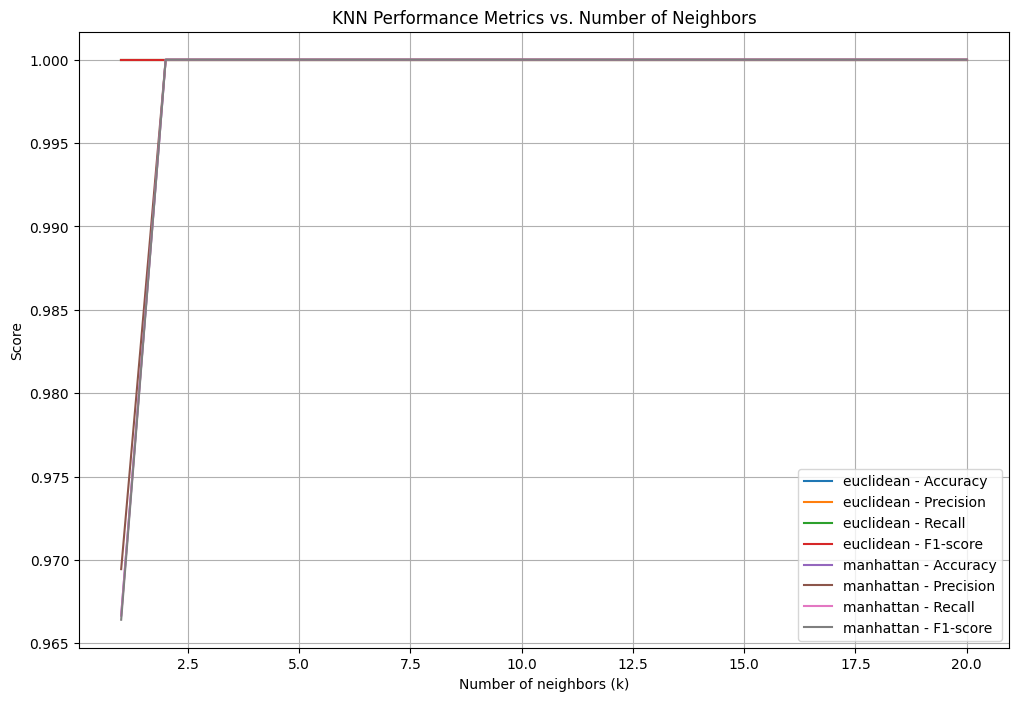

In [5]:
# Cell 5: Plot performance metrics
# Visualize how different performance metrics change with the number of neighbors (k) for both distance metrics
plt.figure(figsize=(12, 8))
for metric in distance_metrics:
    plt.plot(k_values, results[metric]['accuracy'], label=f'{metric} - Accuracy')
    plt.plot(k_values, results[metric]['precision'], label=f'{metric} - Precision')
    plt.plot(k_values, results[metric]['recall'], label=f'{metric} - Recall')
    plt.plot(k_values, results[metric]['f1'], label=f'{metric} - F1-score')

plt.xlabel('Number of neighbors (k)')
plt.ylabel('Score')
plt.title('KNN Performance Metrics vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Cell 6: Find best model and print results
# Determine the best-performing model based on accuracy
best_k = 0
best_metric = ''
best_accuracy = 0

for metric in distance_metrics:
    max_accuracy = max(results[metric]['accuracy'])
    if max_accuracy > best_accuracy:
        best_accuracy = max_accuracy
        best_k = k_values[results[metric]['accuracy'].index(max_accuracy)]
        best_metric = metric

print(f"Best performance: k={best_k}, metric={best_metric}, accuracy={best_accuracy:.4f}")

Best performance: k=1, metric=euclidean, accuracy=1.0000


<Figure size 1000x800 with 0 Axes>

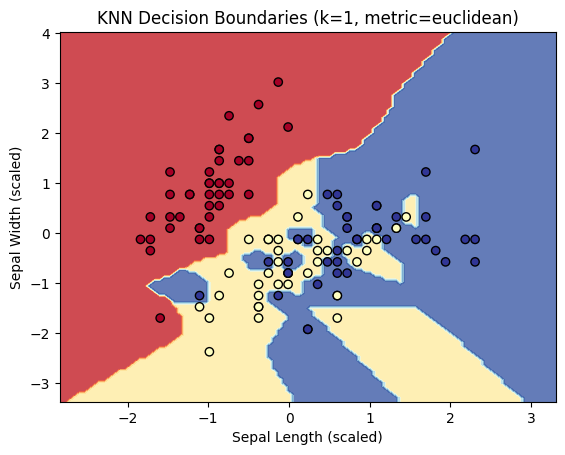

In [7]:
# Cell 7: Visualize decision boundaries
# Visualize the decision boundaries for the best-performing model using the first two features
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
best_knn.fit(X_train_scaled[:, [0, 1]], y_train)  # Use only the first two features for visualization

plt.figure(figsize=(10, 8))
DecisionBoundaryDisplay.from_estimator(
    best_knn,
    X_train_scaled[:, [0, 1]],
    cmap=plt.cm.RdYlBu,
    alpha=0.8,
    response_method="predict"
)

# Convert string labels to numerical labels for color mapping
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_numeric = le.fit_transform(y_train)

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train_numeric, cmap=plt.cm.RdYlBu, edgecolor='black') # Use numerical labels for color mapping
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.title(f'KNN Decision Boundaries (k={best_k}, metric={best_metric})')
plt.show()